**Bảng phân công công việc:**

Thành viên | MSSV | Bài tập
--- | --- | ---
Đinh Anh Huy | 18110103 | 8.11, 8.23, 8.28
Nguyễn Đức Vũ Duy | 18110004 | 8.22, 8.26, 8.29


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
def read_symmetric_matrix(path_file):
    with open(path_file, 'r') as f:
        lines = f.readlines()
        size = len(lines)
        matrix = np.zeros((size,size))
        for i, line in enumerate(lines):
            for j, elem in enumerate(line.split()):
                matrix[int(i),int(j)] = matrix[int(j),int(i)] = elem
        return matrix

### 8.11

**Xét bộ dữ liệu census-tract được liệt kê ở bảng 8.5. Giả sử các quan sát trên $X_5=$ giá nhà trung bình (Median home value) có đơn vị là $\$10,000$ thay vì $\$100,000$; tức là, nhân tất cả các số được liệt kê trong cột thứ 6 của bảng 8.5 với 10.**

In [42]:
path_11 = 'T8-5.txt'
data_11 = pd.read_table(path_11, delim_whitespace=True, header=None)
data_11.columns = ['total_population', 'professional_degree', 'employed_agre_over_16', 'goverment_employment', 'median_home_value']

data_11['median_home_value'] *= 10

data_11

,total_population,professional_degree,employed_agre_over_16,goverment_employment,median_home_value
0,2.67,5.71,69.02,30.3,14.8
1,2.25,4.37,72.98,43.3,14.4
2,3.12,10.27,64.94,32.0,21.1
3,5.14,7.44,71.29,24.5,18.5
4,5.54,9.25,74.94,31.0,22.3
...,...,...,...,...,...
56,2.14,6.30,86.54,17.4,28.0
57,6.62,4.79,78.84,20.0,23.3
58,4.24,5.82,71.39,27.1,16.9
59,4.72,4.71,78.01,20.6,15.5


**(a) Xây dựng ma trận hiệp phương sai mẫu S cho bộ dữ liệu census-tract khi $X_5 =$ giá nhà trung bình với đơn vị là $\$10,000$.**

In [43]:
S = np.cov(data_11.T)
print(S)

[[  3.39689902  -1.10213937   4.30555484  -2.07828525   0.27203907]
 [ -1.10213937   9.67277464  -1.51323628  10.95323224  12.03063661]
 [  4.30555484  -1.51323628  55.62591164 -28.93746421  -0.43559071]
 [ -2.07828525  10.95323224 -28.93746421  89.06661202   9.57299727]
 [  0.27203907  12.03063661  -0.43559071   9.57299727  31.8625082 ]]


**(b) Tính các cặp trị riêng - vectơ riêng và 2 thành phần chính đầu tiên với ma trận hiệp phương sai ở câu (a).**

In [63]:
def eigen_pairs(model, data):
    eigenvals = model.explained_variance_
    eigenvecs = model.components_

    print(">> Eigenanalysis")
    eigenvals_ = pd.DataFrame(eigenvals.reshape(1,-1))
    eigenvals_.columns = ['PC%s' % i for i in range(1, model.n_components_+1)]
    eigenvals_.index = ['Eigenvalue']
    
    eigenvecs_ = pd.DataFrame(eigenvecs.T)
    eigenvecs_.columns = ['PC%s' % i for i in range(1, model.n_components_+1)]
    eigenvecs_.index = data.columns
    print(eigenvals_)
    print("\n",eigenvecs_)

In [64]:
pca = PCA(n_components=5).fit(data_11)

In [65]:
eigen_pairs(pca, data_11)

>> Eigenanalysis
                   PC1        PC2        PC3       PC4       PC5
Eigenvalue  108.271939  43.139674  31.267127  4.598098  2.347868

                             PC1       PC2       PC3       PC4       PC5
total_population      -0.037629 -0.062309 -0.039979  0.555532 -0.827338
professional_degree    0.118930 -0.249301  0.260525 -0.768392 -0.515175
employed_agre_over_16 -0.479673 -0.759677 -0.430649 -0.028079  0.080986
goverment_employment   0.858912 -0.316400 -0.393644  0.068674  0.049898
median_home_value      0.128935 -0.506704  0.768189  0.308955  0.202630


2 thành phần chính đầu tiên sau khi phân tích thành phần chính là:
$$ \hat{y}_1 = -0.03762881x_1 +0.11892964x_2 - 0.47967291x_3 +0.85891177x_4 +0.12893518x_5$$
và
$$ \hat{y}_2 = -0.06230915x_1 -0.24930105x_2 -0.75967654x_3 -0.31639989x_4 -0.50670427x_5$$

In [8]:
X_pca = pca.transform(data_11)
print(X_pca[:,:2])

[[ 4.13372335e+00  1.21669721e+00]
 [ 1.32049359e+01 -5.34190546e+00]
 [ 8.88861668e+00 -5.78791120e-01]
 [-1.34695715e+00 -1.13264943e+00]
 [ 3.17532805e+00 -8.36370286e+00]
 [ 2.68620768e+01  6.72092884e+00]
 [ 1.13007597e+01  4.31435575e-01]
 [ 1.01018802e+01  1.78821333e+00]
 [-1.11999062e+01 -8.87943089e+00]
 [-3.17269194e+00  1.08813047e+00]
 [ 3.86736079e+00  6.03416355e+00]
 [-1.12676764e+01 -5.63723573e+00]
 [-1.18520797e+01 -6.74257795e+00]
 [-9.22785045e+00  7.62472475e+00]
 [ 3.11476073e+00 -2.21866241e+00]
 [ 9.56916672e+00 -2.43798069e+00]
 [ 1.48086077e+01 -6.89362948e+00]
 [ 1.25696500e+00 -7.93857209e+00]
 [ 1.20147715e+01  7.13886558e-02]
 [ 6.80325982e+00  4.06913082e+00]
 [-4.71378255e+00  1.32086945e+01]
 [-6.47193932e+00  1.24208360e+00]
 [-8.00849814e+00 -1.00133570e+01]
 [-6.41950249e+00  6.44822392e+00]
 [-8.20461403e+00 -6.94419801e-01]
 [ 1.19116150e+01 -1.15976047e-01]
 [ 3.77805996e+00  4.73439092e+00]
 [ 2.18797935e+00 -6.09141756e+00]
 [-2.25758202e+00 -1

**(c) Tính tỉ lệ của phương sai tổng được giải thích bởi 2 thành phần chính đầu tiên thu được ở câu (b). Tính hệ số tương quan, $r_{y_i, x_k}$, và giải thích các thành phần này nếu có. So sánh kết quả của bạn với kết quả ở ví dụ 8.3. Bạn có thể nói gì về ảnh hưởng của sử thay đổi tỷ lệ đối với các thành phần chính?**

In [9]:
proportions = np.cumsum(pca.explained_variance_ratio_)
print(">> The proportion of total variance explained: ", proportions[1])

>> The proportion of total variance explained:  0.7984804100381016


In [10]:
def correlation_coef(model, cov_mat):
    eigenvecs = model.components_
    eigenvals = model.explained_variance_
    diag = [cov_mat[i][i] for i in range(cov_mat.shape[0])]
    corr_coef = [eigenvecs[i]*np.sqrt(eigenvals[i])/np.sqrt(diag) for i in range(model.n_components_)]
    return corr_coef

In [11]:
corr_coef = correlation_coef(pca, S)[:2]
corr_coef = pd.DataFrame(corr_coef)
corr_coef.columns = ['X1', 'X2', 'X3', 'X4', 'X5']
corr_coef.index = ['r_Y1_Xi', 'r_Y2_Xi']
print(">> The correlation coefficients: ")
corr_coef

>> The correlation coefficients: 


,X1,X2,X3,X4,X5
r_Y1_Xi,-0.212440,0.397899,-0.669213,0.946998,0.237678
r_Y2_Xi,-0.222049,-0.526486,-0.669004,-0.220200,-0.589594


Nhận xét về hệ số tương quan: 

* Đối với thành phần chính thứ 1 ($Y_1$), có sự chênh lệch rõ ràng ở hệ số tương quan giữa $X_4$ (goverment employment (%)) so với các biến khác, với hệ số 0.946998, có trọng số cao nhất trong thành phần chính $Y_1$. *Goverment employment (%)* cũng có mối tương quan lớn nhất (xét trên giá trị tuyệt đối) với $Y_1$. Biến có mối tương quan cao thứ 2 với $Y_1$ là $X_3$ (Employed age over 16 (%)), với hệ số -0.669213. Hệ số của *Employed age over 16 (%)* cũng tính là khá cao so với các biến còn lại. Như vậy, 2 biến *Goverment employment (%)* và *Employed age over 16 (%)* tham gia giải thích cho $Y_1$ nhiều nhất trong đó *Goverment employment (%)* đóng góp nhiều hơn.


* Đối với thành phần chính thứ 2 ($Y_2$), $Y_2$ được giải thích bởi các thành phần có hệ số dường như gần bằng nhau là *professional degree (%)* ($X_2$), *employed age over 16 (%)* ($X_3$) và *median home value* ($X_5$) với các hệ số lần lượt là -0.526486, -0.669004, -0.589594. Do các hệ số này có sự chênh lệch không quá cao nên ta có thể nói cả 3 biến này đều tham gia giải thích cho $Y_2$ là như nhau.

Kết quả ở ví dụ 8.3

Variable | $\hat{e}_1(r_{\hat{y}_1,x_k})$ | $\hat{e}_2(r_{\hat{y}_2,x})$ | $\hat{e}_3$ | $\hat{e}_4$ | $\hat{e}_5$
-----------------: | :-: | :-: | :-: | :-: | :-:
Total population | -0.039(-.22) | 0.071(.24) | 0.188 | 0.977 | -0.058
Profession | 0.105(.35) | 0.130(.26) | -0.961 | 0.171 | -0.139
Employment (%) | -0.492(-.68) | 0.864(.73) | 0.046 | -0.091 | 0.005
Goverment employment (%) | 0.863(.95) | 0.480(.32) | 0.153 | -0.030 | 0.007
Median home value | 0.009(.16) | 0.015(.17) | -0.125 | 0.082 | 0.989
Variance ($\hat{\lambda}_i$): | 107.02 | 39.67 | 8.37 | 2.87 | 0.15
Cumulative percentage of total variance | 67.7 | 92.8 | 98.1 | 99.9 | 1.000

Sự thay đổi tỷ lệ ở $X_5$ không ảnh hưởng quá nhiều lên thành phần chính thứ 1. Cụ thể, ta có thể thấy các hệ số tương quan ở trên với kết quả ở ví dụ 8.3 có sự chệnh lệch rất nhỏ. Trong khi bản chất của thành phần chính thứ 2 bị ảnh hưởng khá nhiều khi các hệ số tương quan của các biến với $Y_2$ ở trên chênh lệch nhiều so với kết quả ở ví dụ 8.3.

### 8.23

**Một nhà tự nhiên học của Alaska Fish and Game Department nghiên cứu về gấu xám với mục tiêu duy trì một quần thể khoẻ mạnh. Các phép đo trên $n=61$ con gấu được cung cấp theo các thống kê sau:**

Variable | Weight (kg) | Body length (cm) | Neck (cm) | Girth (cm) | Head length (cm) | Head width (cm)
--- | --- | --- | --- | --- | --- | --- 
Sample mean $\overline{x}$ | 95.52 | 164.38 | 55.69 | 93.39 | 17.98 | 31.13

**và ma trận covariance:**

$$ \textbf{S} = \left[\begin{array}[rrrrrr] 
 3266.46 & 1343.97 & 731.54 & 1175.5  & 162.68 & 238.37\\
 1343.97 & 721.91 & 324.25&  537.35 &  80.17  &117.73\\
  731.54 & 324.25 & 179.28&  281.17 &  39.15  & 56.8 \\
 1175.5  & 537.35 & 281.17&  474.98 &  63.73  & 94.85\\
  162.68 &  80.17 &  39.15&   63.73 &   9.95  & 13.88\\
  238.37 & 117.73 &  56.8 &   94.85 &  13.88  & 21.26\\
\end{array}\right]$$

In [84]:
x_mean = np.array([95.52, 164.38, 55.69, 93.39, 17.98, 31.13])
S = read_symmetric_matrix('P8-23.txt')
print(">> Sample mean: \n", x_mean)
print("\n>> Covariance matrix: \n", S)

>> Sample mean: 
 [ 95.52 164.38  55.69  93.39  17.98  31.13]

>> Covariance matrix: 
 [[3266.46 1343.97  731.54 1175.5   162.68  238.37]
 [1343.97  721.91  324.25  537.35   80.17  117.73]
 [ 731.54  324.25  179.28  281.17   39.15   56.8 ]
 [1175.5   537.35  281.17  474.98   63.73   94.85]
 [ 162.68   80.17   39.15   63.73    9.95   13.88]
 [ 238.37  117.73   56.8    94.85   13.88   21.26]]


**(a) Thực hiện phân tích thành phần chính bằng cách sử dụng ma trận hiệp phương sai. Dữ liệu có thể còn đảm bảo thông tin khi số chiều ít hơn 6 hay không?**

In [102]:
def PCA_(matrix, n_components=None, correlation=False, column_names=None, return_=False):
    # Eigendecomposition
    eigenvals, eigenvecs = np.linalg.eigh(matrix)

    # Sort paires (eigenvalue, eigenvector) in descending order
    eigenpairs = [(abs(eigenval), eigenvec) for (eigenval, eigenvec) in zip(eigenvals, eigenvecs.T)]
    eigenpairs = sorted(eigenpairs, key = lambda pair: pair[0], reverse = True)

    # Select a subset from the rearranged Eigenvalues vector
    # If n_components is None, select all. Otherwise, select first n_components elements
    if n_components is None:
        eigenpairs_ = eigenpairs
    else:
        eigenpairs_ = eigenpairs[:n_components]

    # Construct weight matrix from above subset
    components_ = [eigenvec for (_, eigenvec) in eigenpairs_]
    explained_variance_ = [eigenval for (eigenval, _) in eigenpairs_]

    # Calculate percentage of cariance explained by each of the selected components
    explained_variance_ratio_ = []
    if correlation:
        for i in range(len(explained_variance_)):
            explained_variance_ratio_.append(explained_variance_[i]/len(explained_variance_))
    else:
        for i in range(len(explained_variance_)):
            explained_variance_ratio_.append(explained_variance_[i]/np.sum(eigenvals))
    explained_variance_ratio_ = np.array(explained_variance_ratio_)
        
    if correlation:
        print(">> Eigenanalysis of the Correlation Matrix")
    else:
        print(">> Eigenanalysis of the Covariance Matrix")
    
    eigenanalys = np.concatenate([np.array(explained_variance_).reshape(-1,1), explained_variance_ratio_.reshape(-1,1), np.cumsum(explained_variance_ratio_).reshape(-1,1)], axis=1)  
    eigenanalys = pd.DataFrame(eigenanalys.T)
    eigenanalys.columns = ['PC%s' % i for i in range(1, len(explained_variance_)+1)]
    eigenanalys.index = ['Eigenvalue', 'Proportion', 'Cumulative']
    
    eigenvecs_ = pd.DataFrame(np.array(components_).T)
    eigenvecs_.columns = ['PC%s' % i for i in range(1, len(explained_variance_)+1)]
    if column_names is not None:
        eigenvecs_.index = column_names
    print(eigenanalys)
    print("\n",eigenvecs_)
    
    if return_:
        return explained_variance_, components_, explained_variance_ratio_

In [86]:
column_names = ['Weight', 'Body_length', 'Neck', 'Girth', 'Head_length', 'Head_width']
PCA_(S, column_names = column_names)

>> Eigenanalysis of the Covariance Matrix
                    PC1         PC2        PC3       PC4       PC5       PC6
Eigenvalue  4478.873817  152.466164  32.323857  8.116758  1.516856  0.542547
Proportion     0.958286    0.032621   0.006916  0.001737  0.000325  0.000116
Cumulative     0.958286    0.990907   0.997823  0.999559  0.999884  1.000000

                   PC1       PC2       PC3       PC4       PC5       PC6
Weight      -0.849339 -0.470832  0.226606 -0.074260  0.008692  0.000202
Body_length -0.368552  0.846078  0.368132 -0.012754  0.110784  0.019105
Neck        -0.194132  0.058127 -0.303143  0.928388  0.012289  0.070597
Girth       -0.314678  0.216748 -0.848576 -0.355060  0.082353 -0.032666
Head_length -0.043918  0.060354 -0.001815  0.060162 -0.440119 -0.892805
Head_width  -0.064458  0.092026 -0.033880 -0.052267 -0.887138  0.443264


Dựa vào chỉ số proportion of total variance theo từng thành phần chính, ta thấy rằng:
* Thành phần chính đầu tiên giải thích đến 95.8% trên tổng số phương sai mẫu. Hay nói cách khác, thành phần chính đầu tiên lưu giữ đến 95,8% lượng thông tin của dữ liệu ban đầu. 
* Với 2 thành phần chính đầu tiên sau khi thực hiện PCA, lượng thông tin được giải thích lên đến 99.1% so với lượng thông tin ban đầu. 

Do đó, dữ liệu trên có thể được tóm tắt một cách hiệu quả với số chiều nhỏ hơn 6 (cụ thể là 1 chiều).

**(b) Thực hiện phân tích thành phần chính bằng cách sử dụng ma trận tương quan.**

In [87]:
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [88]:
R = correlation_from_covariance(S)
print(">> Correlation matrix: \n", R)

>> Correlation matrix: 
 [[1.         0.87520416 0.95594627 0.94372682 0.90236855 0.90454733]
 [0.87520416 1.         0.90130656 0.9176521  0.9459296  0.95030712]
 [0.95594627 0.90130656 1.         0.96353035 0.92694572 0.92002745]
 [0.94372682 0.9176521  0.96353035 1.         0.92703198 0.94388274]
 [0.90236855 0.9459296  0.92694572 0.92703198 1.         0.95432499]
 [0.90454733 0.95030712 0.92002745 0.94388274 0.95432499 1.        ]]


In [89]:
PCA_(R, correlation=True, column_names=column_names)

>> Eigenanalysis of the Correlation Matrix
                 PC1       PC2       PC3       PC4       PC5       PC6
Eigenvalue  5.644572  0.175775  0.056519  0.049241  0.047339  0.026555
Proportion  0.940762  0.029296  0.009420  0.008207  0.007890  0.004426
Cumulative  0.940762  0.970058  0.979477  0.987684  0.995574  1.000000

                   PC1       PC2       PC3       PC4       PC5       PC6
Weight      -0.403681  0.558277  0.279671 -0.280325  0.593023 -0.129981
Body_length -0.404307 -0.532271 -0.196208 -0.716909 -0.023653 -0.014435
Neck        -0.409952  0.389254  0.037865 -0.061752 -0.560953  0.600421
Girth       -0.412002  0.222934 -0.575998  0.243759 -0.230551 -0.579835
Head_length -0.409135 -0.319023  0.701510  0.289800 -0.240282 -0.311445
Head_width  -0.410341 -0.319407 -0.240755  0.510141  0.471388  0.434954


Sau khi thực hiện phân tích thành phần chính với ma trận tương quan, ta thấy rằng:
* Thành phần chính thứ nhất giải thích đến 94.1% phương sai mẫu tổng thể. 
* 2 thành phần chính đầu tiên giải thích đến 97% phương sai mẫu tổng thể. 
* Các thành phần chính còn lại chỉ giải thích được 1 phần rất nhỏ phương sai mẫu tổng thể (dưới 1%).

Do đó dữ liệu ban đầu có thể được tóm tắt hiệu quả chỉ với số chiều ít hơn 6 (cụ thể là 1 chiều).

**(c) Nhận xét điểm giống và khác nhau giữa 2 phép phân tích.**

Từ kết quả của câu (a) và (b), ta thấy rằng cả 2 phép phần tích đều cho ra cùng một kết quả:
* Thành phần chính thứ nhất giữ phần lớn thông tin của dữ liệu (hơn 94%).
* 2 thành phần chính đầu tiền đóng góp vào việc giữ lượng thông tin của dữ liệu lên đến hơn 95%.
* Các thành phần chính còn lại đều giải thích 1 phần rất nhỏ phương sai mẫu tổng thể (dưới 1%).
* Dữ liệu ban đầu được tóm tắt hiệu quả với số chiều nhỏ hơn 6 (cụ thể là 1 chiều).

Việc phân tích bằng 2 ma trận như trên cho ra sự chênh lệch ở thành phần thứ 2 và các thành phần còn lại. Tuy nhiên, các thành phần này tham gia giải thích phương sai mẫu tổng thể rất ít nên ảnh hưởng không nhiều đến kết quả.

### 8.28

**Bộ dữ liệu survey được thu thập như một phần của cuộc nghiên cứu nhằm đánh giá các lựa chọn để tăng cường đảm bảo an toàn lương thực thực phẩm thông qua việc sử dụng nguồn tài nguyên thiên nhiên ở vùng Sikasso của Mali (Tây Phi). Tổng số $n=76$  nông dân đã được khảo sát và các quan trắc trên 9 biến**

* $x_1 = $ Family (tổng số thành viên trong hộ)
* $x_2 = $ DistRd (khoảng cách tính bằng kilometers đến đường có thể đi qua gần nhất)
* $x_3 = $ Cotton (số hectares bông được trồng trong năm 2000)
* $x_4 = $ Maize (số hectares ngô được trồng trong năm 2000)
* $x_5 = $ Sorg (số hectares cao lương được trồng trong năm 2000)
* $x_6 = $ Millet (số hectares kê được trồng trong năm 2000)
* $x_7 = $ Bull (tổng số con bò hoặc gia súc kéo)
* $x_8 = $ Cattle (tổng số gia súc)
* $x_9 = $ Goats (tổng số con dê)

**được ghi lại. Dữ liệu được liệt kê trong bảng 8.7 và trên website [www.prenhall.com/statistics](www.prenhall.com/statistics).**

In [90]:
path_28 = 'T8-7.txt'
data_28 = pd.read_table(path_28, delim_whitespace=True, header=None)
data_28.columns = ['Family', 'DistRD', 'Cotton', 'Maize', 'Sorg', 'Millet', 'Bull', 'Cattle', 'Goats']

data_28

,Family,DistRD,Cotton,Maize,Sorg,Millet,Bull,Cattle,Goats
0,12,80.0,1.5,1.0,3.0,0.25,2,0,1
1,54,8.0,6.0,4.0,0.0,1.00,6,32,5
2,11,13.0,0.5,1.0,0.0,0.00,0,0,0
3,21,13.0,2.0,2.5,1.0,0.00,1,0,5
4,61,30.0,3.0,5.0,0.0,0.00,4,21,0
...,...,...,...,...,...,...,...,...,...
71,21,500.0,5.0,1.0,3.0,4.00,1,0,5
72,13,100.0,0.5,0.5,0.0,1.00,0,0,4
73,24,100.0,2.0,3.0,0.0,0.50,3,14,10
74,29,90.0,2.0,1.5,1.5,1.50,2,0,2


**(a) Xây dựng các biểu đồ phân tán 2 chiều của Family versus DistRd, và DistRd versus Cattle. Loại bỏ ngoại lai từ bộ dữ liệu.**

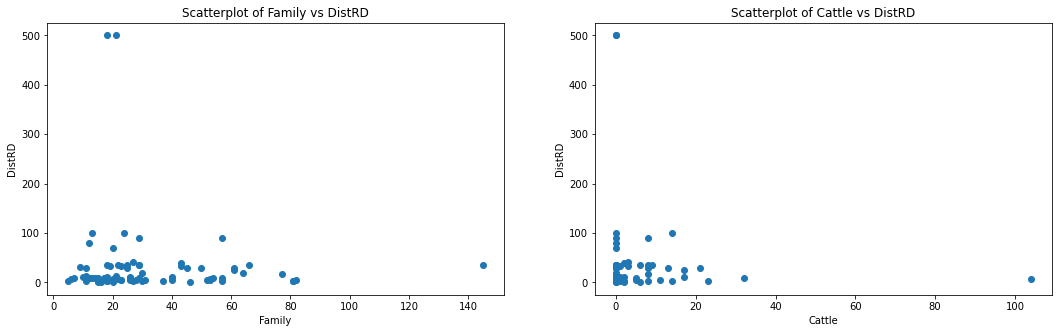

In [91]:
fig, axs = plt.subplots(1, 2, figsize=(18,5))
axs[0].scatter(data_28['Family'], data_28['DistRD'])
axs[0].set_xlabel('Family')
axs[0].set_ylabel('DistRD')
axs[0].set_title('Scatterplot of Family vs DistRD')

axs[1].scatter(data_28['Cattle'], data_28['DistRD'])
axs[1].set_xlabel('Cattle')
axs[1].set_ylabel('DistRD')
axs[1].set_title('Scatterplot of Cattle vs DistRD')

plt.show()

In [92]:
outliers = data_28.loc[(data_28['Family']>100) | (data_28['DistRD']>200) | (data_28['Cattle']>100)]
outliers

,Family,DistRD,Cotton,Maize,Sorg,Millet,Bull,Cattle,Goats
24,145,36.0,9.5,7.0,13.0,5.5,8,9,15
33,53,7.0,0.0,1.0,11.0,2.0,8,104,10
68,18,500.0,2.0,1.0,1.5,0.5,1,0,0
71,21,500.0,5.0,1.0,3.0,4.0,1,0,5


Dựa vào 2 biểu đồ phân tán, ta phát hiện ra 4 điểm ngoại lai là điểm 24, 33, 68 và 71.

In [93]:
data = data_28.drop(outliers.index, axis=0)
print(">> Shape of data before remove outliers: ", data_28.shape)
print(">> Shape of data after remove outliers: ", data.shape)

>> Shape of data before remove outliers:  (76, 9)
>> Shape of data after remove outliers:  (72, 9)


**(b) Thực hiện phân tích thành phần chính bằng cách sử dụng ma trận tương quan R. Xác định số thành phần để tóm tắt hiệu quả sự biến thiên. Sử dụng proportion of variation explained và biểu đồ scree để giúp bạn quyết định.**

In [97]:
R = np.corrcoef(data.T)
print(">> Correlation matrix: \n", R)

>> Correlation matrix: 
 [[ 1.         -0.03148898  0.7568462   0.6552768   0.38803015  0.49645168
   0.7333791   0.55328914  0.36173366]
 [-0.03148898  1.         -0.03110498  0.10982068 -0.21839611 -0.0832359
   0.0283732   0.06006817  0.1709544 ]
 [ 0.7568462  -0.03110498  1.          0.71570668  0.40686821  0.35205719
   0.82134476  0.59865242  0.3726093 ]
 [ 0.6552768   0.10982068  0.71570668  1.         -0.02987731  0.17561072
   0.62896348  0.5298674   0.05091172]
 [ 0.38803015 -0.21839611  0.40686821 -0.02987731  1.          0.36384004
   0.31818024  0.06017202  0.23713752]
 [ 0.49645168 -0.0832359   0.35205719  0.17561072  0.36384004  1.
   0.33620013  0.12529839  0.24981286]
 [ 0.7333791   0.0283732   0.82134476  0.62896348  0.31818024  0.33620013
   1.          0.66980799  0.50378916]
 [ 0.55328914  0.06006817  0.59865242  0.5298674   0.06017202  0.12529839
   0.66980799  1.          0.38185786]
 [ 0.36173366  0.1709544   0.3726093   0.05091172  0.23713752  0.24981286
   0.5

In [103]:
eigenvals, eigenvecs, proportions = PCA_(R, correlation=True, column_names=data.columns, return_=True)

>> Eigenanalysis of the Correlation Matrix
                 PC1       PC2       PC3       PC4       PC5       PC6  \
Eigenvalue  4.185131  1.438087  1.084500  0.791818  0.604325  0.366136   
Proportion  0.465015  0.159787  0.120500  0.087980  0.067147  0.040682   
Cumulative  0.465015  0.624802  0.745302  0.833282  0.900429  0.941111   

                 PC7       PC8       PC9  
Eigenvalue  0.240024  0.171825  0.118155  
Proportion  0.026669  0.019092  0.013128  
Cumulative  0.967780  0.986872  1.000000  

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Family -0.433843  0.065089  0.098400 -0.171201  0.011327  0.039979 -0.797460   
DistRD -0.007587 -0.496671 -0.568561 -0.495610 -0.377668 -0.186582  0.021070   
Cotton -0.446140 -0.008917  0.132117  0.027337 -0.218708  0.199686  0.361248   
Maize  -0.352228 -0.352571  0.388203 -0.240205 -0.079203  0.273212 -0.023829   
Sorg   -0.203622  0.603667 -0.111492  0.058543 -0.644577 -0.245987 -0.020619   
Millet

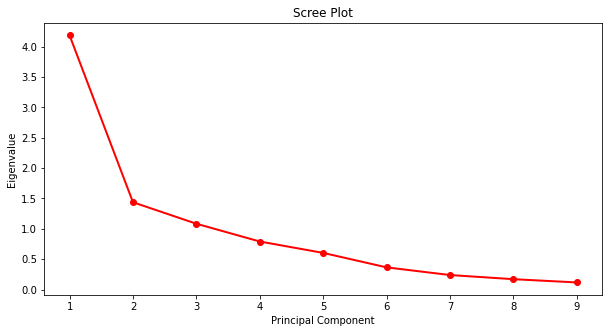

In [105]:
fig, ax = plt.subplots(figsize=(10,5))

PC_values = np.arange(len(eigenvals)) + 1
ax.plot(PC_values, eigenvals, 'ro-', linewidth=2)
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue')

plt.show()

Dựa vào bảng phân tích eigenanalysis, ta thấy rằng 5 thành phần chính đầu tiên giải thích đến 90% tổng phương sai của tổng thể trong bộ dự liệu. Trên biểu đồ scree, ta có thế thấy rằng chọn 5 làm số thành phần chính là hợp lý mặc dù độ gấp khúc không quá rõ nét. Do đó, ta chọn số thành phần chính để tóm tắt dữ liệu hiệu quả là 5.

**(c) Diễn giải năm thành phần chính đầu tiên. Chẳng hạn, bạn có thể xác định một thành phần là "farm size"? Một thành phần là "goats and distance to road"?**

* Thành phần chính thứ 1, tất cả các biến (cây trồng, vật nuôi, gia đình) ngoại trừ biến khoảng cách đến đường có thể đi qua gần nhất (DistRD) đều tham gia góp phần giải thích cho thành phần này tương đối là như nhau. Do đó thành phần này có thể gọi là *kích thước nông trại* (farm size).
* Thành phần chính thứ 3, các biến DistRD và Goats tham gia giải thích cho thành phần này cao nhất trong tất cả các biến. Do đó, thành phần này có thể gọi là *goats and distance to road*.
* Thành phần chính thứ 5, các biến Sorg và Mallet tham gia giải thích cho thành phần này cao nhất trong tất cả các biến. Do đó, thành phần chính này có thể gọi là *sorghum and millet size*.
* 2 thành phần chính còn lại khó có thể diễn giải do có nhiều biến yếu tố cùng tham gia